In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib


In [2]:
df = pd.read_csv("pMumbai.csv")


In [4]:
X = df.drop(["PRECTOTCORR", "HR", "DY", "MO", "YEAR",
            "QV2M", "WS50M", "WD50M"], axis=1)
Y = df["PRECTOTCORR"]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)

In [6]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info


array([0.6277123 , 0.16759919])

In [7]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)


Unnamed: 0    0.627712
T2M           0.167599
dtype: float64

<AxesSubplot:>

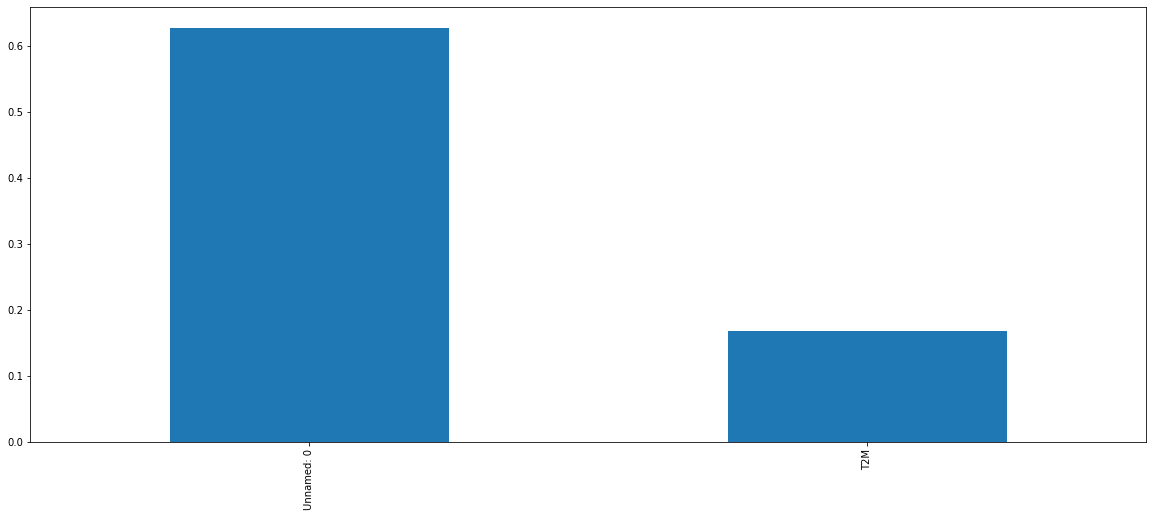

In [8]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))


In [9]:
sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))


The number of classes before fit Counter({1.0: 42236, 0.0: 27901})
The number of classes after fit Counter({1.0: 42236, 0.0: 42236})


In [10]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)


LogisticRegression()

In [11]:
y_pred2 = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[ 6975     0]
 [10560     0]]
0.397775876817793
              precision    recall  f1-score   support

         0.0       0.40      1.00      0.57      6975
         1.0       0.00      0.00      0.00     10560

    accuracy                           0.40     17535
   macro avg       0.20      0.50      0.28     17535
weighted avg       0.16      0.40      0.23     17535



c:\Users\ajaym\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ajaym\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ajaym\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


c:\Users\ajaym\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.5

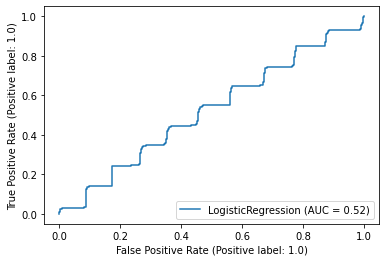

In [12]:
metrics.plot_roc_curve(logreg, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred2, average=None)


In [13]:
gnb = GaussianNB()
gnb.fit(X_train_res, y_train_res)


GaussianNB()

In [14]:
y_pred3 = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[6342  633]
 [4538 6022]]
0.7051040775591674
              precision    recall  f1-score   support

         0.0       0.58      0.91      0.71      6975
         1.0       0.90      0.57      0.70     10560

    accuracy                           0.71     17535
   macro avg       0.74      0.74      0.71     17535
weighted avg       0.78      0.71      0.70     17535



c:\Users\ajaym\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7397562316715542

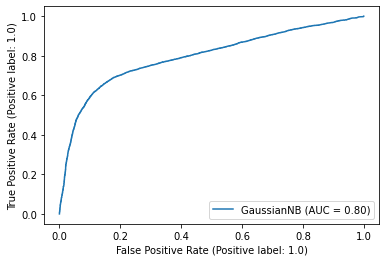

In [15]:
metrics.plot_roc_curve(gnb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred3, average=None)


In [16]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res, y_train_res)


KNeighborsClassifier(n_neighbors=3)

In [17]:
y_pred4 = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[[ 6845   130]
 [  217 10343]]
0.980211006558312
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      6975
         1.0       0.99      0.98      0.98     10560

    accuracy                           0.98     17535
   macro avg       0.98      0.98      0.98     17535
weighted avg       0.98      0.98      0.98     17535



c:\Users\ajaym\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.9804063823721082

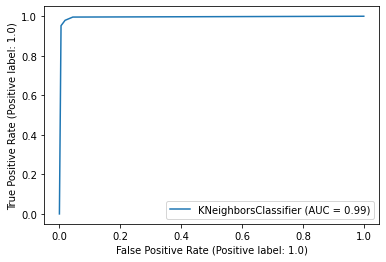

In [18]:
metrics.plot_roc_curve(knn, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred4, average=None)


In [19]:
svc = SVC()


In [20]:
svc.fit(X_train_res, y_train_res)


SVC()

In [21]:
y_pred5 = svc.predict(X_test)
print(confusion_matrix(y_test,y_pred5))
print(accuracy_score(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

[[5346 1629]
 [6744 3816]]
0.5224978614200171
              precision    recall  f1-score   support

         0.0       0.44      0.77      0.56      6975
         1.0       0.70      0.36      0.48     10560

    accuracy                           0.52     17535
   macro avg       0.57      0.56      0.52     17535
weighted avg       0.60      0.52      0.51     17535



c:\Users\ajaym\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.563907624633431

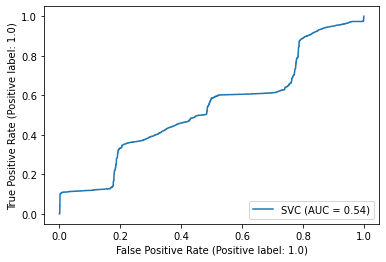

In [22]:
metrics.plot_roc_curve(svc, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred5, average=None)



In [23]:
rf=RandomForestClassifier()
rf.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [24]:
y_pred1 = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[6422  553]
 [ 697 9863]]
0.928714000570288
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91      6975
         1.0       0.95      0.93      0.94     10560

    accuracy                           0.93     17535
   macro avg       0.92      0.93      0.93     17535
weighted avg       0.93      0.93      0.93     17535



c:\Users\ajaym\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.9273565289996742

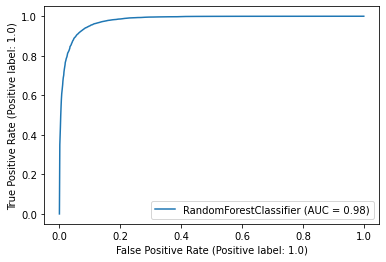

In [25]:
metrics.plot_roc_curve(rf, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred1, average=None)


In [26]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations=2000, eval_metric="AUC")
cat.fit(X_train_res, y_train_res)


Learning rate set to 0.036274
0:	total: 172ms	remaining: 5m 43s
1:	total: 192ms	remaining: 3m 12s
2:	total: 209ms	remaining: 2m 19s
3:	total: 225ms	remaining: 1m 52s
4:	total: 240ms	remaining: 1m 35s
5:	total: 257ms	remaining: 1m 25s
6:	total: 275ms	remaining: 1m 18s
7:	total: 293ms	remaining: 1m 13s
8:	total: 311ms	remaining: 1m 8s
9:	total: 328ms	remaining: 1m 5s
10:	total: 344ms	remaining: 1m 2s
11:	total: 364ms	remaining: 1m
12:	total: 388ms	remaining: 59.3s
13:	total: 407ms	remaining: 57.8s
14:	total: 428ms	remaining: 56.6s
15:	total: 450ms	remaining: 55.8s
16:	total: 473ms	remaining: 55.2s
17:	total: 497ms	remaining: 54.7s
18:	total: 521ms	remaining: 54.4s
19:	total: 543ms	remaining: 53.8s
20:	total: 567ms	remaining: 53.4s
21:	total: 591ms	remaining: 53.2s
22:	total: 616ms	remaining: 53s
23:	total: 640ms	remaining: 52.7s
24:	total: 659ms	remaining: 52.1s
25:	total: 680ms	remaining: 51.6s
26:	total: 701ms	remaining: 51.3s
27:	total: 723ms	remaining: 51s
28:	total: 745ms	remaining:

In [27]:
y_pred = cat.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[6161  814]
 [ 733 9827]]
0.9117764471057884
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.89      6975
         1.0       0.92      0.93      0.93     10560

    accuracy                           0.91     17535
   macro avg       0.91      0.91      0.91     17535
weighted avg       0.91      0.91      0.91     17535



c:\Users\ajaym\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.906942306125774

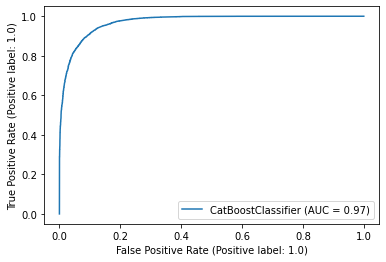

In [28]:
from sklearn import metrics
metrics.plot_roc_curve(cat, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None)


In [29]:
joblib.dump(rf, "rf.pkl")
joblib.dump(logreg, "logreg.pkl")
joblib.dump(gnb, "gnb.pkl")
joblib.dump(knn, "knn.pkl")
joblib.dump(svc, "svc.pkl")
# joblib.dump(xgb, "xgb.pkl")
joblib.dump(svc, "cat.pkl")


['cat.pkl']

In [30]:
joblib.dump(gnb, "gnb.pkl")


['gnb.pkl']